In [1]:
import numpy as np
from get_data import xor_data
from get_data import donut_data
from get_data import fig_data
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time

#Xtrain,Ytrain,Xtest,Ytest=fig_data(limit=2000,ratio=0.5)
Xtrain,Ytrain=donut_data()
Xtest,Ytest=donut_data()
#idx = np.logical_or(Ytrain == 0., Ytrain == 1.)
#Xtrain = Xtrain[idx]
#Ytrain = Ytrain[idx]
X=Xtrain
Y=Ytrain

In [2]:
count_x=sorted(list(set(Xtrain[:,0])))
#print(np.shape(Xtrain))
#count_x

In [3]:
#X = [[2.771244718,1.784783929],
#[1.728571309,1.169761413],
#[3.678319846,2.81281357],
#[3.961043357,2.61995032],
#[2.999208922,2.209014212],
#[7.497545867,3.162953546],
#[9.00220326,3.339047188],
#[7.444542326,0.476683375],
#[10.12493903,3.234550982],
#[6.642287351,3.319983761]]
#Y=[0,0,0,0,0,1,1,1,1,1]
#np.shape(X)

In [4]:
def gini(Y):
    list_y=[]
    list_j=[]
    sumj=0.0
    count_y=sorted(list(set(Y)))
    #print(count_y,Y)
    for j in count_y:
        
        jj=np.array([j]*len(Y))
        cj=((np.sum(Y==jj))/len(Y))**2.0
        #print(cj,len(Y),np.sum(Y[Y==j]))
        list_y.append(cj)
        list_j.append(j)
        sumj=cj+sumj
        
    zipped=zip(list_j, list_y)    
    #print(list_y)
    #print(list_j)
    return 1.0-1.0*sumj,sorted(zipped, key=lambda x: x[1])[-1][0]  
#mixing=[1.0,2.0,3.0,4.0,5.0]
#gini(Ytrain)


In [5]:
def information_Gain(i,j,Yright,Yleft,current_entropy):
    
    nleft=len(Yleft)
    nright=len(Yright)
    N=nleft+nright
    #_,ent_r=entropy(Yright)
    #_,ent_l=entropy(Yleft)
    
    ent_r,_=gini(Yright)
    ent_l,_=gini(Yleft)
    IG=current_entropy-(nright/N)*ent_r-(nleft/N)*ent_l
    return IG

In [6]:
#X,Y   split
start=time.time()
#X=Xtrain[0:100,:]
#Y=Ytrain[0:100]

    
def best_split(X,Y):
    
    D=np.shape(X)[1]
    N=np.shape(X)[0]

    current_entropy,pred_temp=gini(Y)
    IG_max=-1
    best_col=None
    best_cut=None
    Ypred=-1

    for i in range(D):          #loop through features

        count_x=sorted(list(set(X[:,i])))    #choose whether or not want the first and last item in since become whole if you cut
                                            # then for majority zero it will be empty count_x_new=count_x[1:-1]
        for j in count_x:

            Xleft_=X[X[:,i]<=j,i]   #can do j+(j+1)/2 for  mid points
            Yleft_=Y[X[:,i]<=j]

            Xright_=X[X[:,i]>j,i]
            Yright_=Y[X[:,i]>j]    
            

            if len(Yright_) == 0 or len(Yleft_) == 0:   #make sure is dividing

                continue

            IG=information_Gain(i,j,Yright_,Yleft_,current_entropy)

            if IG>IG_max:

                best_col=i
                best_cut=j
                IG_max=IG
                Ypredict=pred_temp
            else:

                pass
            

    return best_col,best_cut,current_entropy,IG_max
    
#best_col,best_cut,current_entropy,IG_max=best_split(X,Y)    

end=time.time()
#print(end-start)
#print(best_col,best_cut,current_entropy,IG_max)

In [7]:
best_col,best_cut,current_entropy,IG_max=best_split(X,Y)
np.shape(X)

(1000, 2)

In [8]:
def split_data(best_col,best_cut,X,Y):
    
    Xleft=X[X[:,best_col]<=best_cut,:]   #can do j+(j+1)/2 for  mid points
    Yleft=Y[X[:,best_col]<=best_cut]            

    Xright=X[X[:,best_col]>best_cut,:]   #can do j+(j+1)/2 for  mid points
    Yright=Y[X[:,best_col]>best_cut]  
    return Xright,Xleft,Yright,Yleft

In [9]:
Xright,Xleft,Yright,Yleft=split_data(best_col,best_cut,X,Y)
print(np.shape(Xright),np.shape(Xleft))

(148, 2) (852, 2)


In [10]:
def count_pred(Y):
    
    classes,counts=np.unique(Y,return_counts=True)
    return classes[np.argmax(counts)]

In [11]:
count_pred(Y)

0

In [12]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, Y):
        self.predictions = count_pred(Y)
        #self.col = None
        #self.split = None
        #self.left = None
        #self.right = None
        

In [13]:
class decision_node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,best_col,best_cut,left_branch,right_branch):
        
        self.best_col=best_col
        self.best_cut=best_cut
        self.left_branch=left_branch
        self.right_branch=right_branch       

In [34]:
def build_tree(X,Y):
    
    
    if ((len(Y)==1) or len(set(Y))==1):
        
        return Leaf(Y)  # return prediction argmax Y
        #best_col=None   ?
        #best_cut=None
        #left_branch=None
        #right_branch=None
        
        #-> leaf node ->  predict Y[0]  node.right=None, node.left=None
      
    else:    
        #current_entropy,pred_temp=gini(Y)
        best_col,best_cut,current_entropy,IG_max=best_split(X,Y)    #-> need y predict
        
    if IG_max==0.0:
        
        return Leaf(Y)
        #best_col=None     ?
        #best_cut=None
        #left_branch=None
        #right_branch=None
            

        #else:
    #print(best_col,best_cut,IG_max)
    
    Xright,Xleft,Yright,Yleft=split_data(best_col,best_cut,X,Y)
    print(id(Xright),id(Xleft))
    #print(Yleft)
    left_branch=build_tree(Xleft,Yleft)
    right_branch=build_tree(Xright,Yright)
           
    return decision_node(best_col,best_cut,left_branch,right_branch)

In [35]:
my_tree = build_tree(X,Y)

2194655970928 2194655945312
2194655642528 2194655642368
2194674146160 2194674143600
2194674146400 2194674147120
2194674145680 2194674146560
2194674147200 2194673451456
2194673489920 2194674146800
2194674146400 2194673451696
2194674143840 2194674147120
2194674143520 2194674146560
2194673490080 2194674146800
2194673489280 2194674145760
2194673488320 2194673489200
2194674147120 2194674143840
2194674147200 2194674143280
2194674143520 2194674146800
2194674143520 2194674146960
2194674143280 2194674146560
2194673489200 2194673488320
2194655237984 2194655946592
2194673451136 2194673451696
2194655167872 2194655947792
2194673451456 2194673451136


In [16]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing, node.best_col,node.best_cut)

    # Call this function recursively on the true branch
    print (spacing + '--> Left:')
    print_tree(node.left_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> Right:')
    print_tree(node.right_branch, spacing + "  ") 

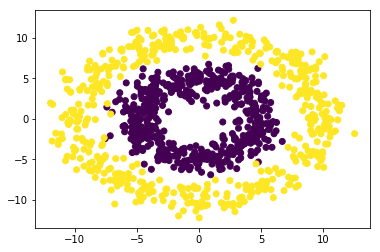

In [17]:
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=Ytrain)
plt.show()

In [18]:
print_tree(my_tree)

 0 6.231569798206468
--> Left:
   1 6.2223559080984705
  --> Left:
     1 -6.365514634537634
    --> Left:
       1 -7.252993926751197
      --> Left:
        Predict 1
      --> Right:
         1 -6.921912912802703
        --> Left:
          Predict 0
        --> Right:
           0 -4.56570955603768
          --> Left:
            Predict 1
          --> Right:
             0 0.20529854744642737
            --> Left:
              Predict 0
            --> Right:
              Predict 1
    --> Right:
       0 -7.098437698884034
      --> Left:
         0 -7.54868444016946
        --> Left:
          Predict 1
        --> Right:
           0 -7.4072489149226515
          --> Left:
             1 -4.553475609395126
            --> Left:
              Predict 1
            --> Right:
              Predict 0
          --> Right:
             0 -7.238038490854053
            --> Left:
              Predict 1
            --> Right:
               0 -7.135582453049431
              --> Le

In [19]:
def predict_sample_(node,X):
    print(node)
    if X[node.best_col] < node.best_cut:
        if isinstance(node.left_branch,list):
            return predict_sample(node.left_branch,X)
        else:
            return node.left_branch
    else:
        if isinstance(node.right_branch,list):
            return predict_sample(node.right_branch,X)
        else:
            return node.right_branch

In [20]:
def predict_sample(node, X):
    """See the 'rules of recursion' above."""
    #print(node)
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if X[node.best_col] <= node.best_cut:
        return predict_sample(node.left_branch,X)
    else:
        return predict_sample(node.right_branch,X)

In [21]:
xx=Xtrain[0,:]
#print(xx)
#print(yy)
yy=Ytrain[0]
predict_sample(my_tree,xx)

0

In [22]:
print(yy)

0


In [23]:
Y_pred=[]
for i,xx in enumerate(Xtrain):
    
    #print ("Actual: %s. Predicted: %s" %
    yy=predict_sample(my_tree, xx)
    Y_pred.append(yy)
    print(Ytrain[i], yy)
print('score',np.mean(Ytrain==Y_pred))    
#score 1.0

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [24]:
Y_pred=[]
for i,xx in enumerate(Xtest):
    
    #print ("Actual: %s. Predicted: %s" %
    yy=predict_sample(my_tree, xx)
    Y_pred.append(yy)
    print(Ytest[i], yy)
print('score',np.mean(Ytest==Y_pred))    
#score 0.978

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


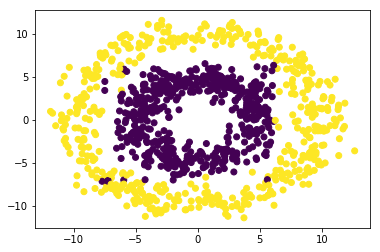

In [31]:
#plt.scatter(Xtest[:,0],Xtest[:,1],c=Ytest)
plt.scatter(Xtest[:,0],Xtest[:,1],c=Y_pred)
plt.show()